## 1. Data Load

In [1]:
import pandas as pd

df = pd.read_csv('./diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## 2. Split Dataset

In [2]:
split_count = int(df.shape[0] * 0.8)

df.shape, split_count

((768, 9), 614)

In [3]:
train = df[:split_count].copy()
test = df[split_count:].copy()

train.shape, test.shape

((614, 9), (154, 9))

## 3. make Dataset

In [4]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
feature_names = train.columns[:-1].tolist()

feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [6]:
label_name = train.columns[-1]

label_name

'Outcome'

In [7]:
train_X = train[feature_names]
train_y = train[label_name]

test_X = test[feature_names]
test_y = test[label_name]

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((614, 8), (614,), (154, 8), (154,))

## 4. ML Modeling

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
model = DecisionTreeClassifier()
# model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier()

In [10]:
from sklearn._config import set_config
set_config(print_changed_only=False)

In [11]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

In [12]:
model.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

## 5. Predict

In [13]:
predict = model.predict(test_X)

predict

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

## 6. Accuracy

In [14]:
score = (test_y.shape[0] - abs(test_y - predict).sum()) / test_y.shape[0]

score

0.7337662337662337

In [15]:
score = model.score(test_X, test_y)

score

0.7337662337662337

In [16]:
from sklearn.metrics import accuracy_score

score = accuracy_score(test_y, predict)

score

0.7337662337662337

## 7. Graph

[Text(0.5716300475059383, 0.9705882352941176, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.19254750593824227, 0.9117647058823529, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(0.03800475059382423, 0.8529411764705882, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(0.019002375296912115, 0.7941176470588235, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(0.009501187648456057, 0.7352941176470589, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.028503562945368172, 0.7352941176470589, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.019002375296912115, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03800475059382423, 0.6764705882352942, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.057007125890736345, 0.7941176470588235, 'BloodPressure <= 56.0\ngini = 0.227\nsamples = 23\nvalue = [20, 

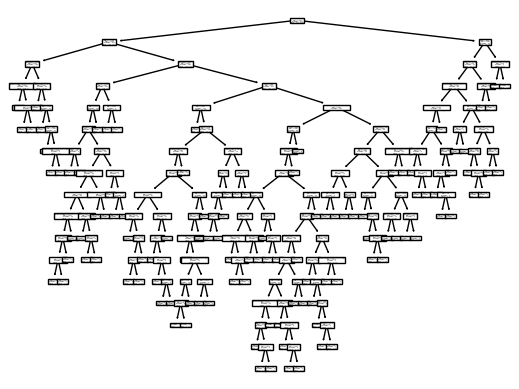

In [17]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names)

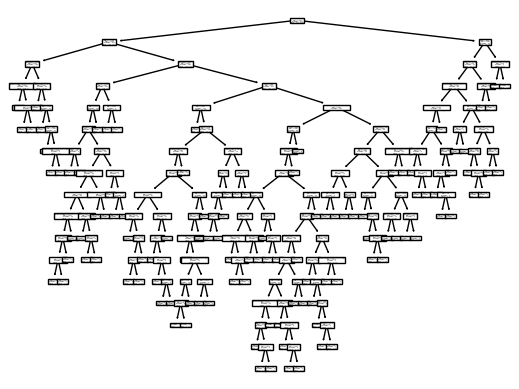

In [18]:
tree = plot_tree(model, feature_names=feature_names)

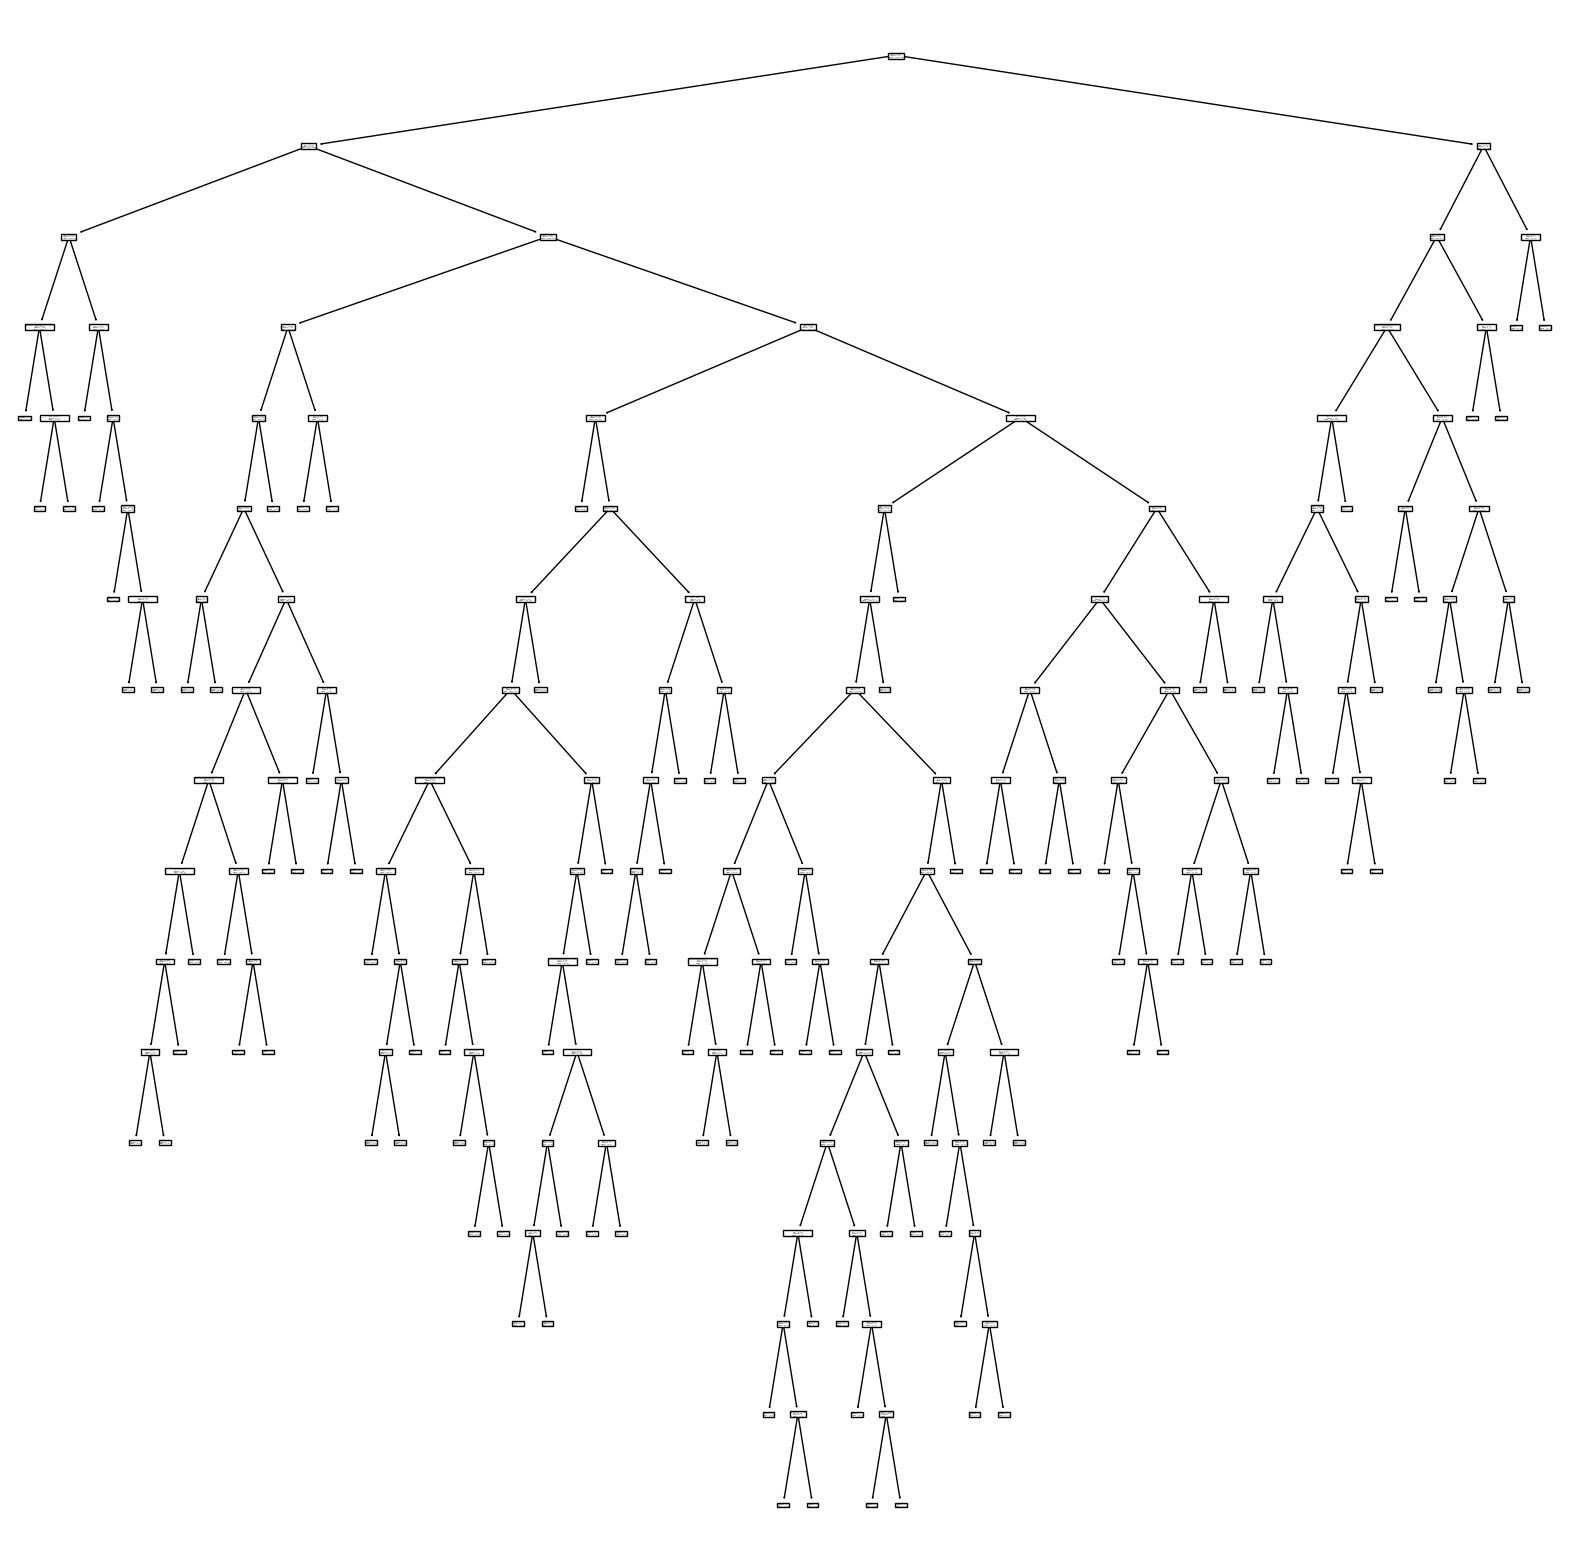

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names)

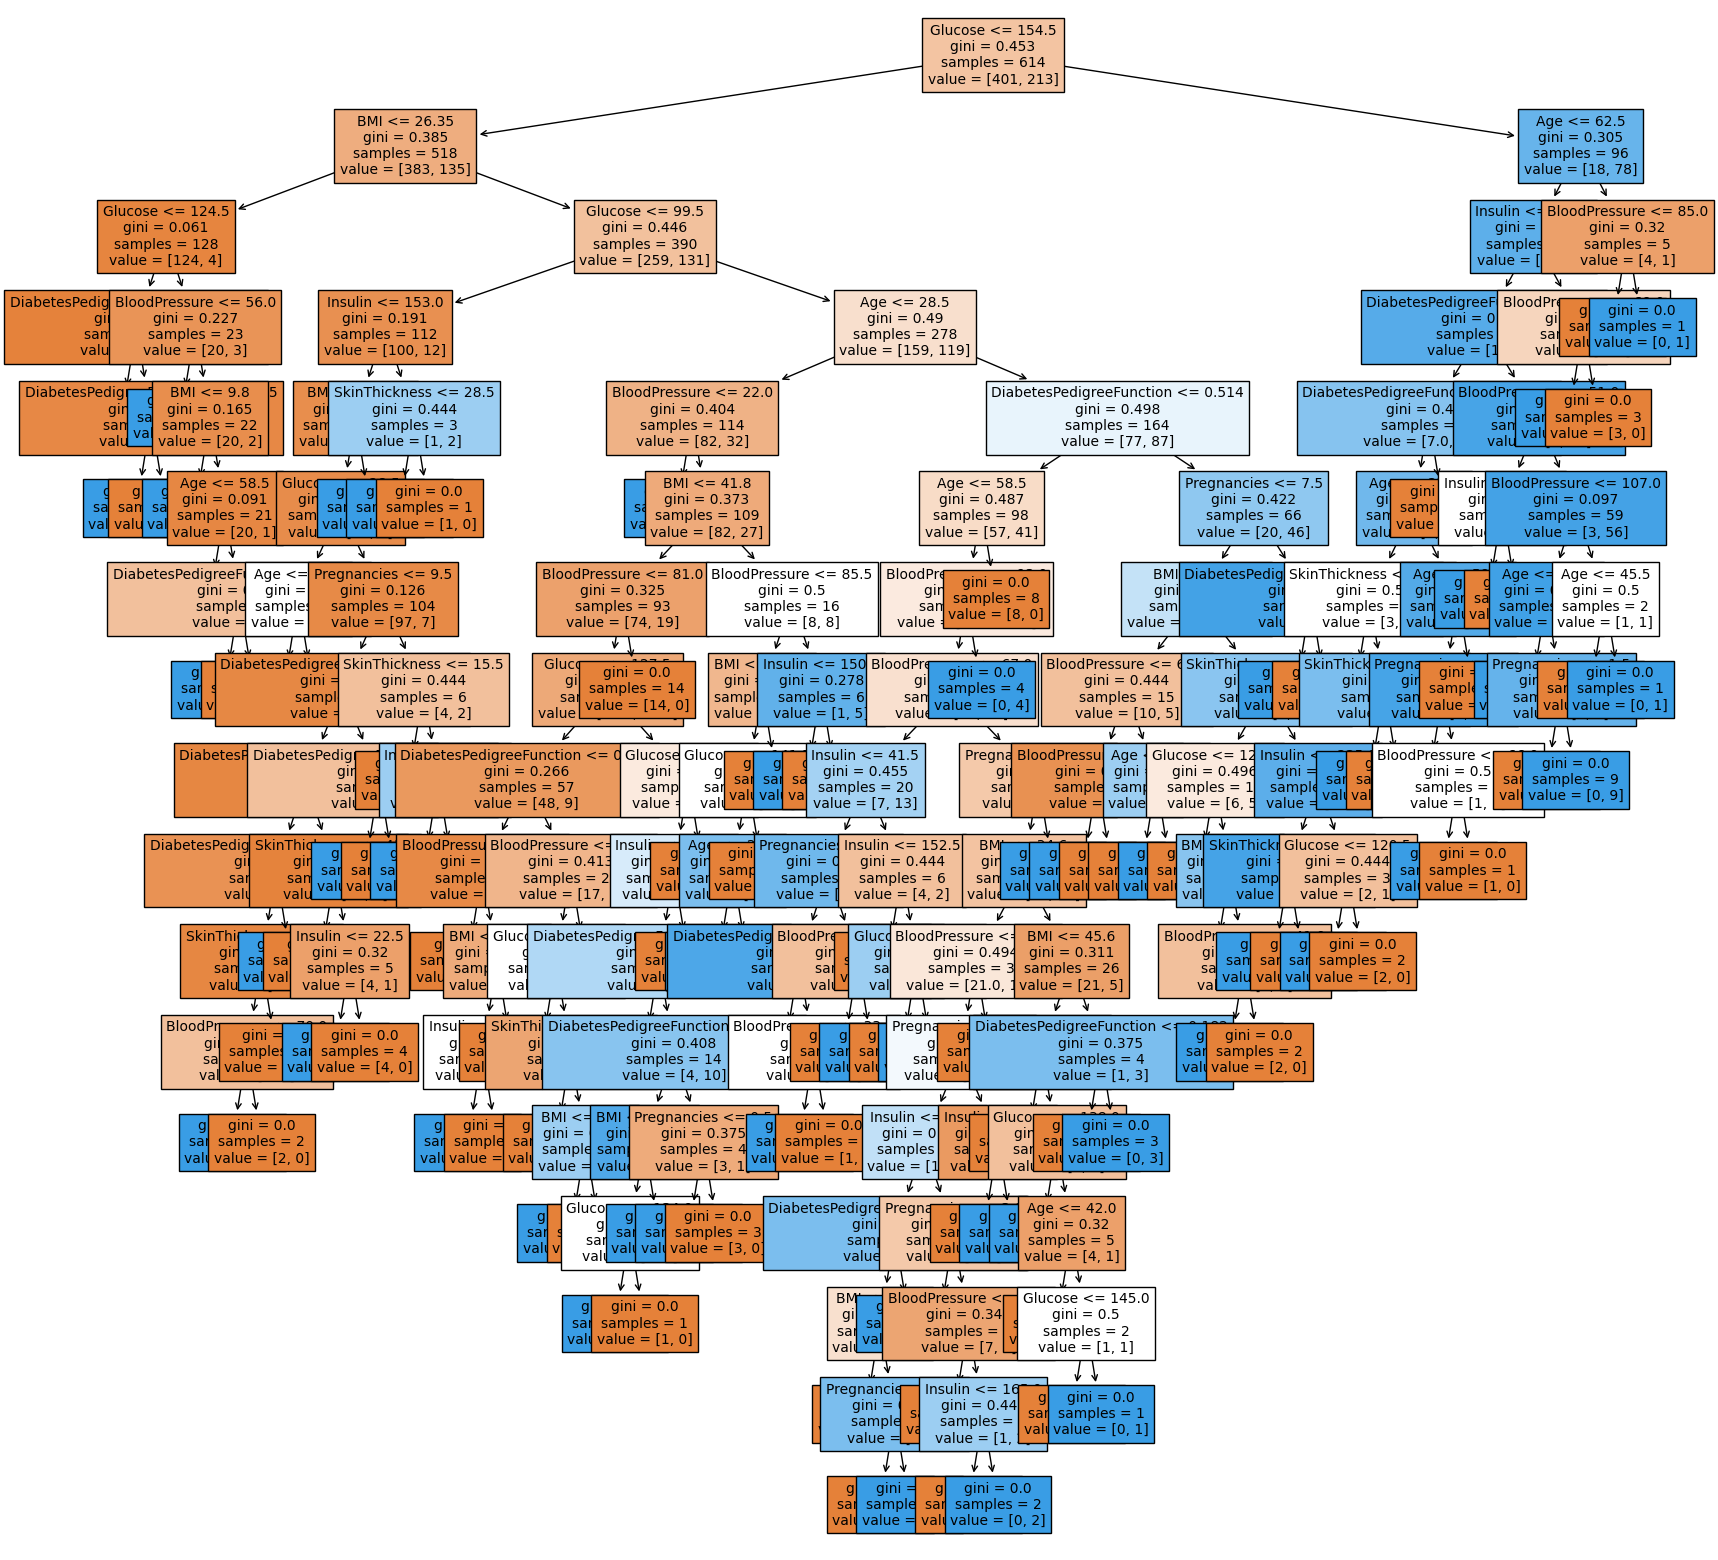

In [20]:
plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

### 7-1 Graphviz

In [21]:
# !sudo apt install -y graphviz
# !pip install graphviz

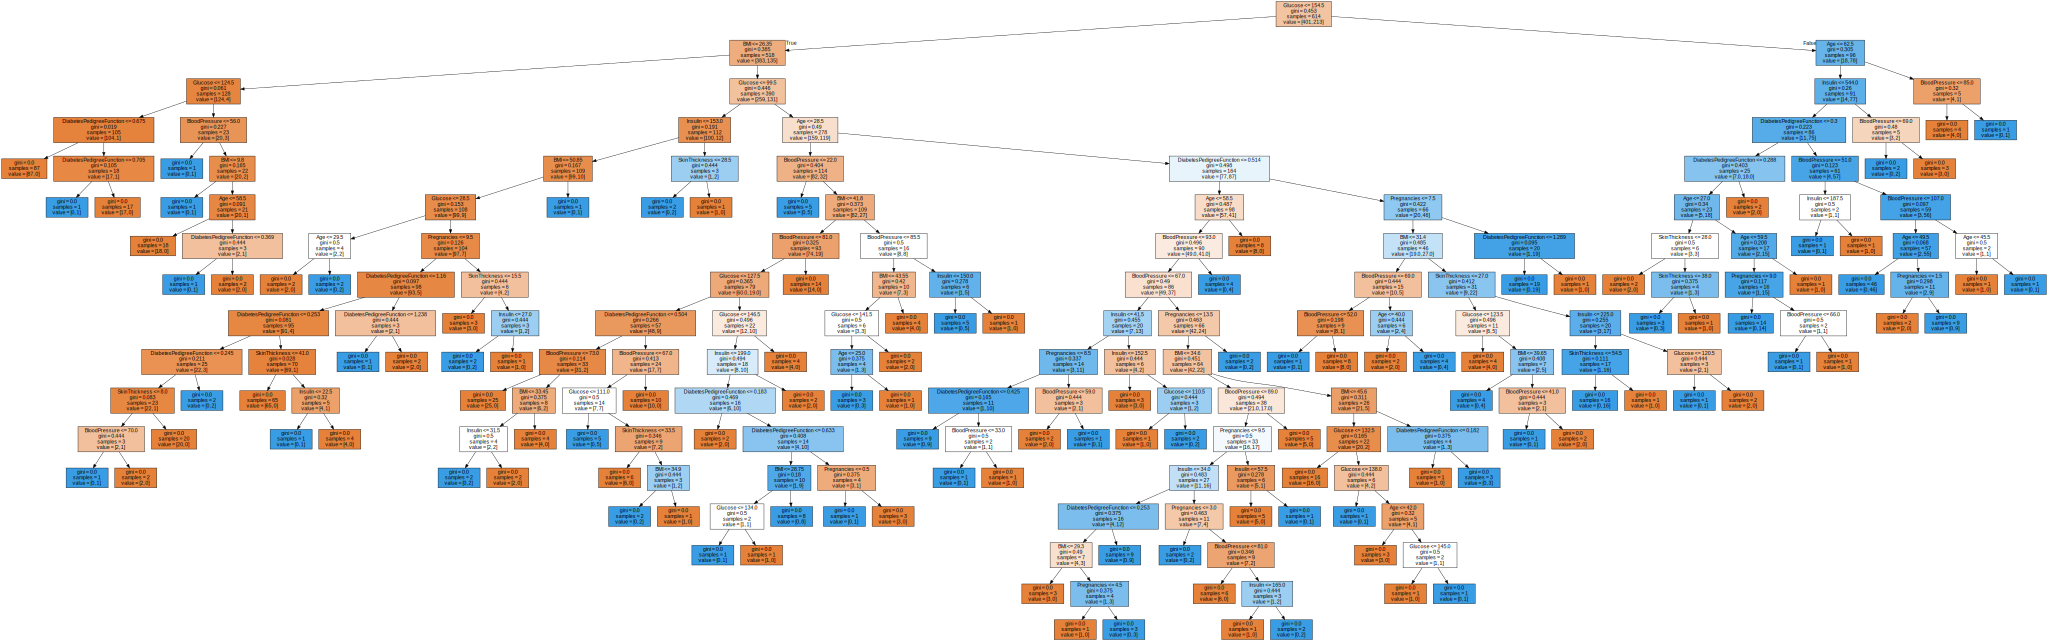

In [22]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names=feature_names, filled=True)
graphviz.Source(dot_tree)

## 8. feature importance

In [23]:
importances = model.feature_importances_

importances

array([0.06727656, 0.31369725, 0.1397205 , 0.04492007, 0.0823385 ,
       0.14115081, 0.1128606 , 0.09803571])

<Axes: >

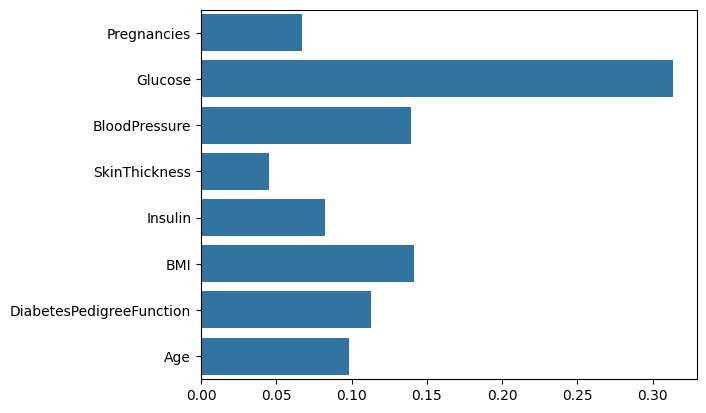

In [24]:
import seaborn as sns

sns.barplot(x=importances, y=feature_names)

<Axes: >

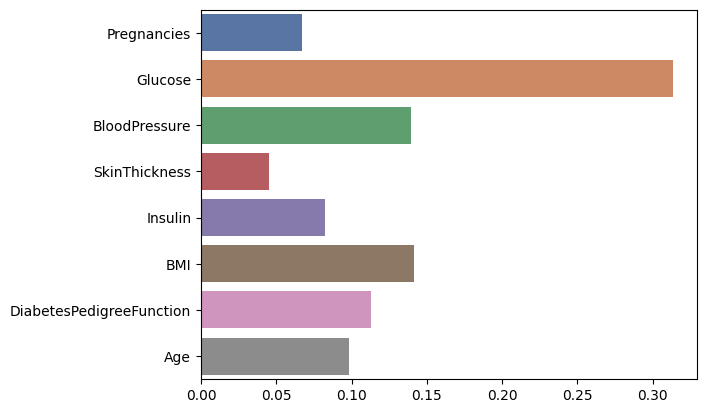

In [25]:
palette = sns.color_palette('deep', 8)
sns.barplot(x=importances, y=feature_names, hue=feature_names, palette=palette)